In [0]:
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
#Making points
p0 = [0,0]
p1 = [0.5,1]
p2 = [1,0]

x=[0,0.5,0.75,1]
y=[0,1,1,0]

a=[0,0.25,0.75,1]
b=[0,0.5,0.5,0]

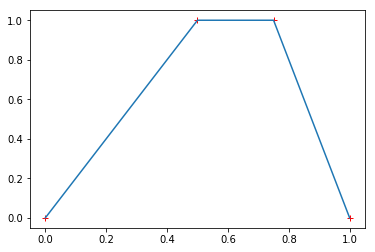

In [42]:
plt.plot(x,y, 'r+')
plt.plot(x,y, linestyle='solid')
#plt.plot(a,b, linestyle='dashed')

In [0]:
def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step

In [34]:
for i in frange(0,1,0.1):
  list_num =

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


In [0]:
#Making the t range
t=[]
for i in frange(0,1,0.01):
  t.append(i)

In [46]:
t

[0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.07,
 0.08,
 0.09,
 0.09999999999999999,
 0.10999999999999999,
 0.11999999999999998,
 0.12999999999999998,
 0.13999999999999999,
 0.15,
 0.16,
 0.17,
 0.18000000000000002,
 0.19000000000000003,
 0.20000000000000004,
 0.21000000000000005,
 0.22000000000000006,
 0.23000000000000007,
 0.24000000000000007,
 0.25000000000000006,
 0.26000000000000006,
 0.2700000000000001,
 0.2800000000000001,
 0.2900000000000001,
 0.3000000000000001,
 0.3100000000000001,
 0.3200000000000001,
 0.3300000000000001,
 0.34000000000000014,
 0.35000000000000014,
 0.36000000000000015,
 0.37000000000000016,
 0.38000000000000017,
 0.3900000000000002,
 0.4000000000000002,
 0.4100000000000002,
 0.4200000000000002,
 0.4300000000000002,
 0.4400000000000002,
 0.45000000000000023,
 0.46000000000000024,
 0.47000000000000025,
 0.48000000000000026,
 0.49000000000000027,
 0.5000000000000002,
 0.5100000000000002,
 0.5200000000000002,
 0.5300000000000002,
 0.54000000

In [0]:
x_range =[]
#x points generation
#x = (1-t)^3xo +3t(1-t)^2x1+3t^2(1-t)x2 +t^3x3

#x = (1-t)^3.0 +3t(1-t)^2.(0.5)+3t^2(1-t).(0.75) +t^3.0
for i in t:
  val = ((1-i)**3)*x[0] +3*i*((1-i)**2)*x[1] + 3*(i**2)*(1-i)*x[2] + (i**3)*x[3]
  x_range.append(val)

In [0]:
y_range =[]
#y points generation
#y = (1-t)^3yo +3t(1-t)^2y1+3t^2(1-t)y2 +t^3y3

#y = (1-t)^3.0 +3t(1-t)^2.(1)+3t^2(1-t).(1) +t^3.0
for i in t:
  val = ((1-i)**3)*y[0] +3*i*((1-i)**2)*y[1] + 3*(i**2)*(1-i)*y[2] + (i**3)*y[3]
  y_range.append(val)

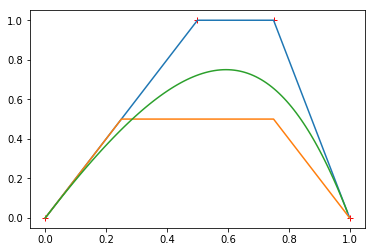

In [55]:
plt.plot(x,y, 'r+')
plt.plot(x,y, linestyle='solid')
plt.plot(a,b, linestyle='solid')
plt.plot(x_range,y_range)